# Setup

In [ ]:
!pip install kaggle
from google.colab import files
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from numpy.random import randn
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

Below, please upload the .json file from your Kaggle API authentication.

In [ ]:
#From open source.
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [ ]:
!kaggle competitions download -c g-research-crypto-forecasting

  0% 0.00/59.0 [00:00<?, ?B/s]
100% 59.0/59.0 [00:00<00:00, 49.1kB/s]
  0% 0.00/458k [00:00<?, ?B/s]
100% 458k/458k [00:00<00:00, 57.2MB/s]
  0% 0.00/444 [00:00<?, ?B/s]
100% 444/444 [00:00<00:00, 446kB/s]
 91% 105M/116M [00:00<00:00, 165MB/s] 
100% 116M/116M [00:00<00:00, 197MB/s]
  0% 0.00/5.78k [00:00<?, ?B/s]
100% 5.78k/5.78k [00:00<00:00, 7.48MB/s]
 98% 1.00G/1.02G [00:06<00:00, 159MB/s]
100% 1.02G/1.02G [00:06<00:00, 171MB/s]
  0% 0.00/406 [00:00<?, ?B/s]
100% 406/406 [00:00<00:00, 1.31MB/s]


In [ ]:
training_data = pd.read_csv('train.csv.zip')  

#Functions:

In [ ]:
def Get_N_Asset(N):
  """Returns a cleaned array of an assets data"""
  data = training_data[training_data["Asset_ID"]==N].to_numpy()
  imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
  imputer.fit(data)
  ouput = imputer.transform(data)
  return ouput

#Linear Regression as a Test

Mean Absolute Error: 0.0012355074956624554
RMS Error: 0.0020169555230517573


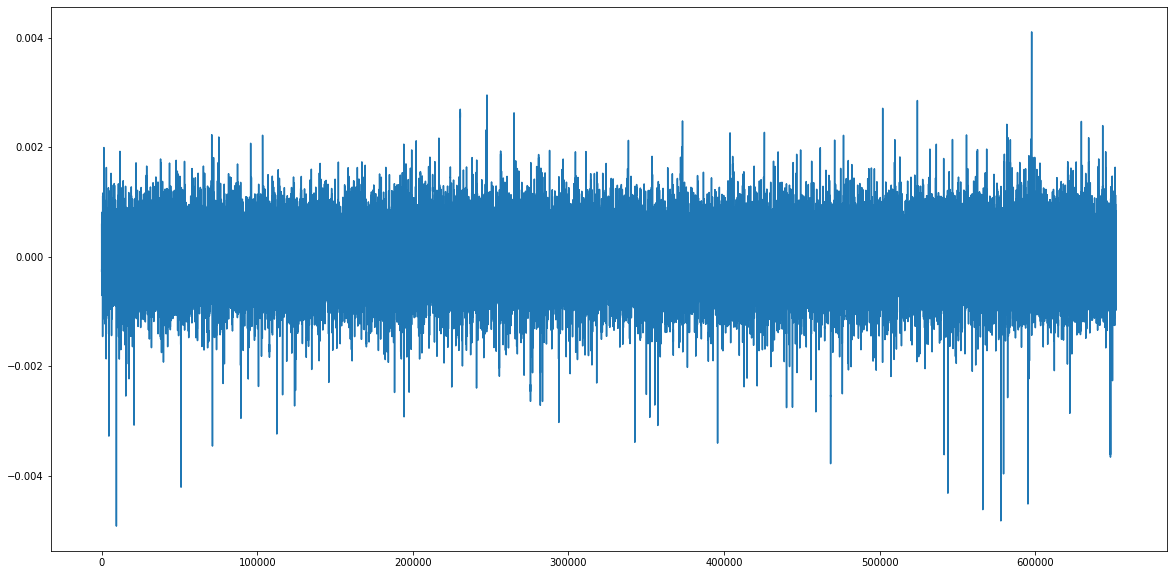

In [ ]:
Asset_1 = Get_N_Asset(1)

X, y = Asset_1[:, :-1], Asset_1[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('RMS Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

fig = plt.figure(figsize=(20,10))
plt.plot(y_pred-y_test)

#ANN Test

In [ ]:
#params:
units_1 = 5
units_2 = 5
batch_size = 5
epoch_number = 5

Asset_1 = Get_N_Asset(1)

X, y = Asset_1[:, :-1], Asset_1[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression - was useful here
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=units_1, activation='relu'))

ann.add(tf.keras.layers.Dense(units=units_2, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

ann.fit(X_train, y_train, batch_size = batch_size, epochs = epoch_number, verbose = 0)

y_pred = ann.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('RMS Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

ValueError: ignored

# XGBoost

In [ ]:
Asset_1 = Get_N_Asset(1)

X, y = Asset_1[:, :-1], Asset_1[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

classifier = XGBRegressor(objective ='reg:squarederror')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

metrics.mean_absolute_error(y_test, y_pred)
fig = plt.figure(figsize=(20,10))
plt.plot(y_pred-y_test)

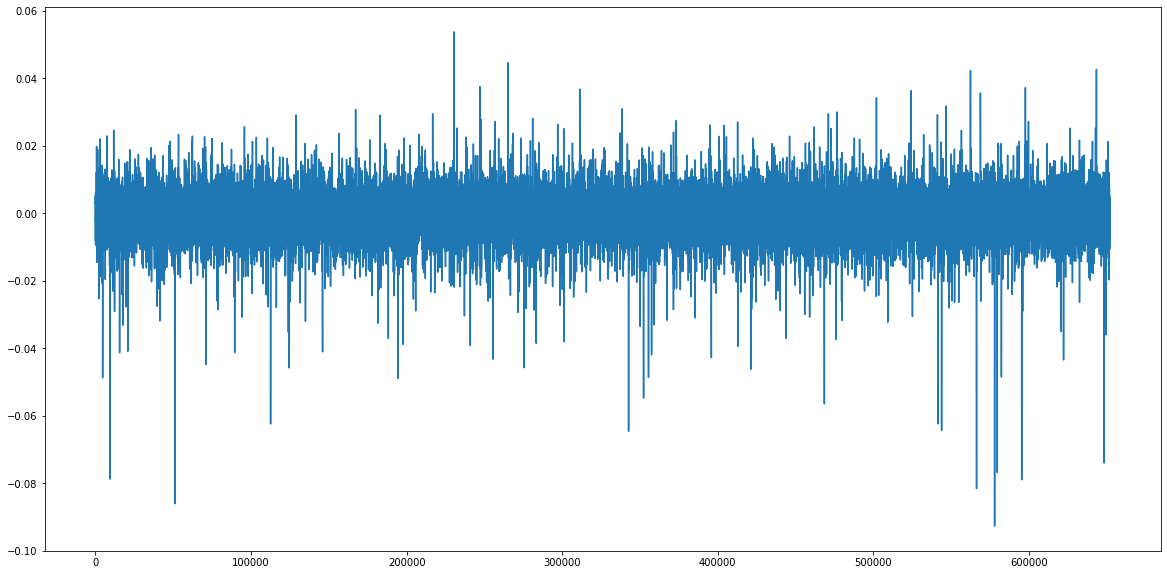

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(y_pred-y_test)

# KNN

Mean Absolute Error: 0.001266188694797544
RMS Error: 0.0020252950348946825


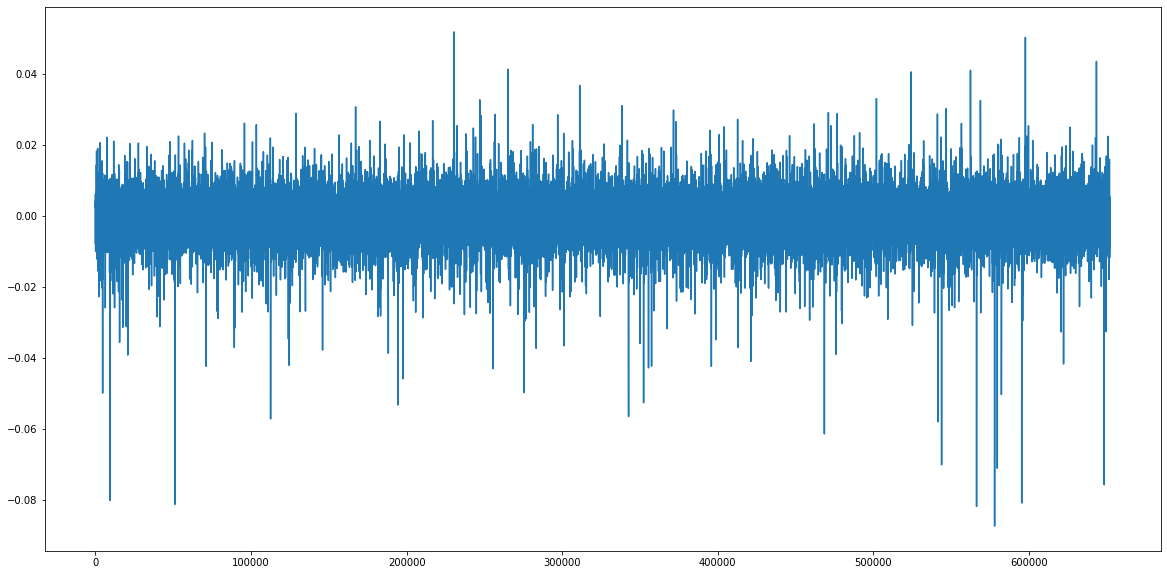

In [ ]:
Asset_1 = Get_N_Asset(1)

X, y = Asset_1[:, :-1], Asset_1[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

params = {'n_neighbors':[15]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

y_pred = model.fit(X_train,y_train).predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('RMS Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

fig = plt.figure(figsize=(20,10))
plt.plot(y_pred-y_test)
